# S4- CASO PRACTICO-BDD FINAL

### Participantes GRUPO 3:

- Juan José Cabrera
- Marco Vinicio Chasiluisa
- Luis Felipe Contreras
- Ana Belén Erazo


### 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [323]:
!pip install linearmodels

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [325]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora ,  llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [326]:
df=pd.read_csv("/Users/belen/Documents/GitHub/S4-CASOPRACTICO-BDDFINAL/Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Recodificar el nombre de las columnas a español

In [327]:
df.rename({ 'Store':'tienda', 'Date': 'fecha', 'Weekly_Sales':'ventas_semanales', 'Holiday_Flag': 'flag_feriado', 'Temperature':'temperatura', 'Fuel_Price': 'precio_combustible', 'CPI': 'CPI', 'Unemployment': 'desempleo'  }, axis=1, inplace=True)

Se separa el campo de fecha para poder categorizar las ventas por año.

In [328]:
df[['dia', 'mes', 'anio']] = df['fecha'].str.split('-', expand=True)
df

,tienda,fecha,ventas_semanales,flag_feriado,temperatura,precio_combustible,CPI,desempleo,dia,mes,anio
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


Se hace el nivel de desempleo como una variable categorica para ver de mejor manera la tasa de desempleo.

In [329]:
# Definir una función para asignar el valor según la comparación
def asignar_valor(valor):
    if valor < 6.891000:
        return 'bajo'
    elif valor >= 6.891000 and valor <= 7.874000:
        return 'medio'
    else:
        return 'alto'
    
df['nivel_desempleo'] = df['desempleo'].apply(lambda x: asignar_valor(x))
df

,tienda,fecha,ventas_semanales,flag_feriado,temperatura,precio_combustible,CPI,desempleo,dia,mes,anio,nivel_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010,alto
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010,alto
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010,alto
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010,alto
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010,alto
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012,alto
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012,alto
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,alto
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,alto


### 2. Obtenga los descriptivos resumen de la base de datos e identifique las variables numéricas y categóricas. Indique ¿hay algo que le llame la atención? 


En dataset podemos encontrar 11 campos. De ellos, 7 son variables númericas y 4 son categóricas.

In [330]:
var_cuantitativas = df.select_dtypes('number').columns
print("Variables cuantitativas:")
print(var_cuantitativas)
var_cualitativas  =df.select_dtypes('object').columns
print("Variables cualitativas:")
print(var_cualitativas)

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Variables cuantitativas:
Index(['tienda', 'ventas_semanales', 'flag_feriado', 'temperatura',
       'precio_combustible', 'CPI', 'desempleo'],
      dtype='object')
Variables cualitativas:
Index(['fecha', 'dia', 'mes', 'anio', 'nivel_desempleo'], dtype='object')


#### Análisis de valores descriptivos

In [331]:
df.describe()

,tienda,fecha,ventas_semanales,flag_feriado,temperatura,precio_combustible,CPI,desempleo,dia,mes,anio,nivel_desempleo
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,71.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,14.678322,5.447552,0.965035,0.763326
std,12.988182,41.282743,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019,0.837657
min,1.000000,0.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,35.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,7.000000,3.000000,0.000000,0.000000
50%,23.000000,71.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,15.000000,5.000000,1.000000,1.000000
75%,34.000000,107.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,22.000000,8.000000,2.000000,2.000000
max,45.000000,142.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,30.000000,11.000000,2.000000,2.000000


Se observa que las ventas semanales tienen una media de alrededor de 1046965 unidades, con una variabilidad considerable representada por una desviación estándar de aproximadamente 564366 unidades. Además, se puede ver un bajo porcentaje de semanas con feriados de solo el 6.99%, y las condiciones climáticas varían desde temperaturas mínimas de -2.06 grados hasta máximas de 100.14 grados. El precio del combustible tiene un rango de 2472 unidades a 4468 unidades, mientras que el CPI y la tasa de desempleo muestran niveles promedio de 171.58 y 7.99%, respectivamente, con desviaciones estándar que indican cierta variabilidad.

### 3. Evalúe si la base contiene datos perdidos.

Se puede observar que no existen valores nulos o perdidos:

In [332]:
df.isna().sum()

tienda                0
fecha                 0
ventas_semanales      0
flag_feriado          0
temperatura           0
precio_combustible    0
CPI                   0
desempleo             0
dia                   0
mes                   0
anio                  0
nivel_desempleo       0
dtype: int64

### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir. 

#### Análisis de valores extremos

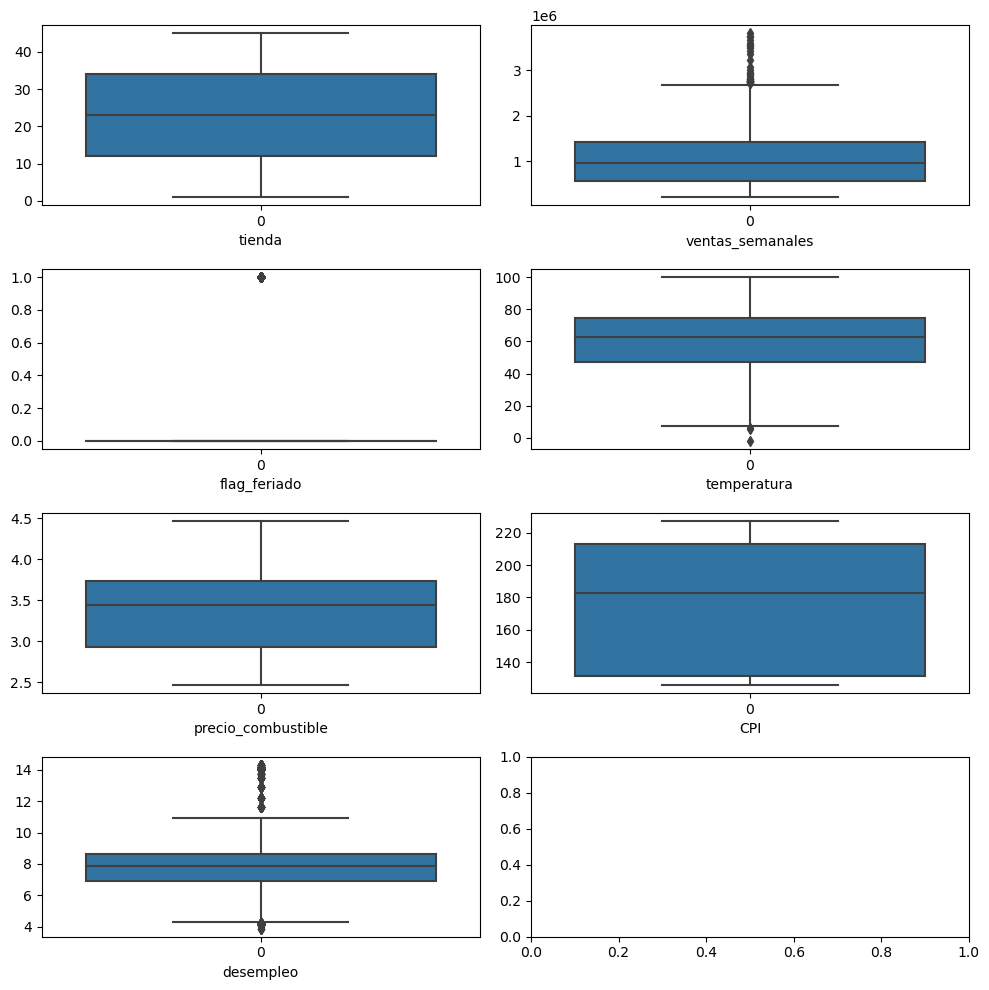

In [333]:
# Box plots
fig, axs = plt.subplots(4,2, figsize = (10,10))
plt1 = sns.boxplot(df['tienda'], ax = axs[0,0]).set(xlabel='tienda')
plt2 = sns.boxplot(df['ventas_semanales'], ax = axs[0,1]).set(xlabel='ventas_semanales')
plt3 = sns.boxplot(df['flag_feriado'], ax = axs[1,0]).set(xlabel='flag_feriado')
plt4 = sns.boxplot(df['temperatura'], ax = axs[1,1]).set(xlabel='temperatura')
plt5 = sns.boxplot(df['precio_combustible'], ax = axs[2,0]).set(xlabel='precio_combustible')
plt6 = sns.boxplot(df['CPI'], ax = axs[2,1]).set(xlabel='CPI')
plt7 = sns.boxplot(df['desempleo'], ax = axs[3,0]).set(xlabel='desempleo')

plt.tight_layout()

De la gráfica de boxplot, podemos ver que las variables donde se requiere el tratamiento de valores extremos son desempleo, temperatura y ventas_semanales.

Para los valores de flag_feriado no será tomado como valores extremos porque representa una variable cualificativa.

#### Tratamiento de valores atípicos


In [334]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['ventas_semanales'].quantile(0.25)
Q3 = df['ventas_semanales'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['ventas_semanales'] < (Q1 - 1.5 * IQR)) |(df['ventas_semanales'] > (Q3 + 1.5 * IQR)))]
df.shape

Q1: 
553350.105
Q3: 
1420158.66
IQR: 
866808.5549999999


(6401, 12)

In [335]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['desempleo'].quantile(0.25)
Q3 = df['desempleo'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['desempleo'] < (Q1 - 1.5 * IQR)) |(df['desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

Q1: 
6.891
Q3: 
8.622
IQR: 
1.7309999999999999


(5920, 12)

In [336]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['temperatura'].quantile(0.25)
Q3 = df['temperatura'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['temperatura'] < (Q1 - 1.5 * IQR)) |(df['temperatura'] > (Q3 + 1.5 * IQR)))]
df.shape

Q1: 
46.965
Q3: 
74.7225
IQR: 
27.757499999999993


(5919, 12)

### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

<Axes: xlabel='tienda', ylabel='Density'>

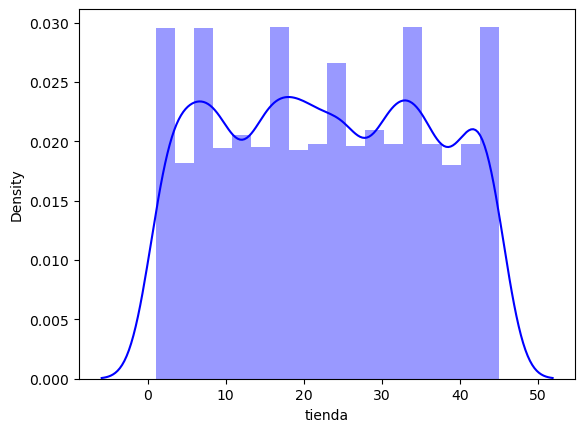

In [337]:
sns.distplot(df['tienda'],color="blue")

<Axes: xlabel='ventas_semanales', ylabel='Density'>

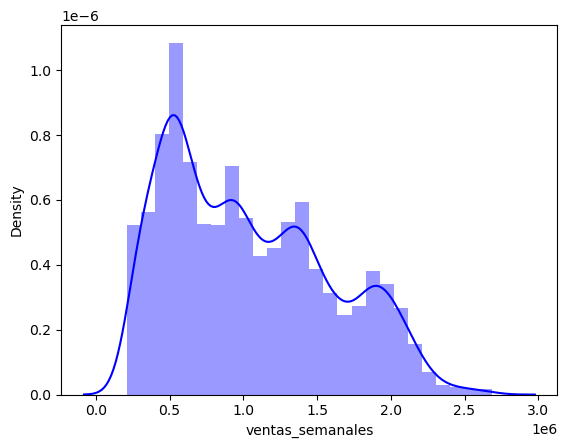

In [338]:
sns.distplot(df['ventas_semanales'],color="blue")

<Axes: xlabel='flag_feriado', ylabel='Density'>

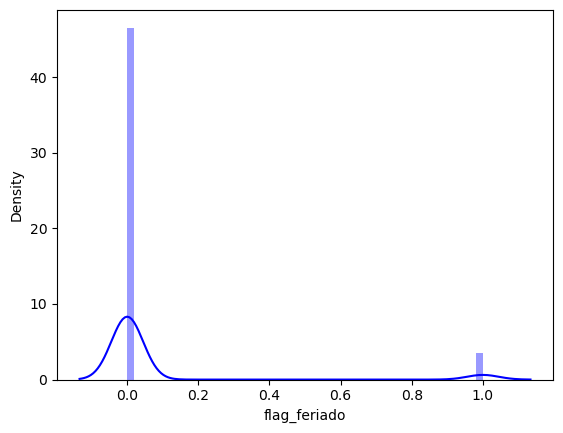

In [339]:
sns.distplot(df['flag_feriado'],color="blue")

<Axes: xlabel='temperatura', ylabel='Density'>

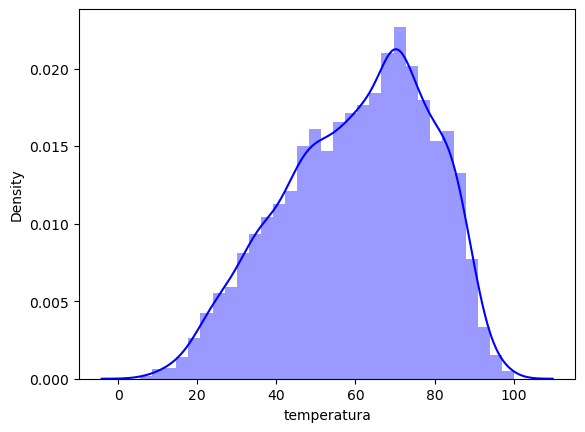

In [340]:
sns.distplot(df['temperatura'],color="blue")

<Axes: xlabel='precio_combustible', ylabel='Density'>

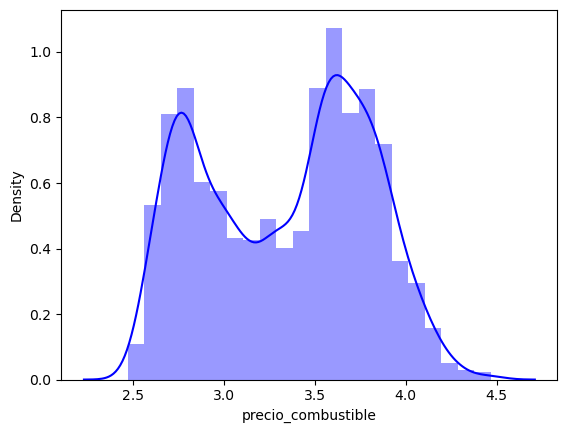

In [341]:
sns.distplot(df['precio_combustible'],color="blue")

<Axes: xlabel='CPI', ylabel='Density'>

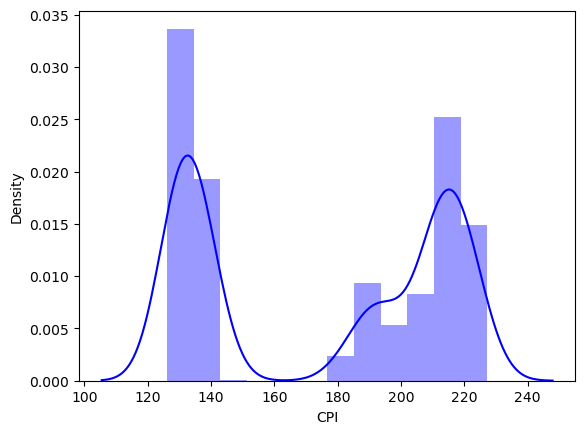

In [342]:
sns.distplot(df['CPI'],color="blue")

<Axes: xlabel='desempleo', ylabel='Density'>

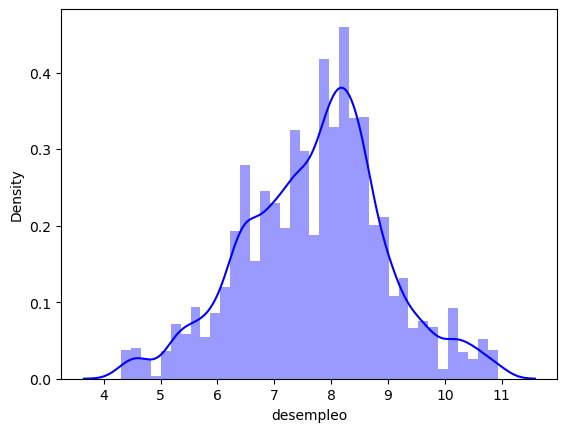

In [343]:
sns.distplot(df['desempleo'],color="blue")

<Axes: xlabel='nivel_desempleo', ylabel='Density'>

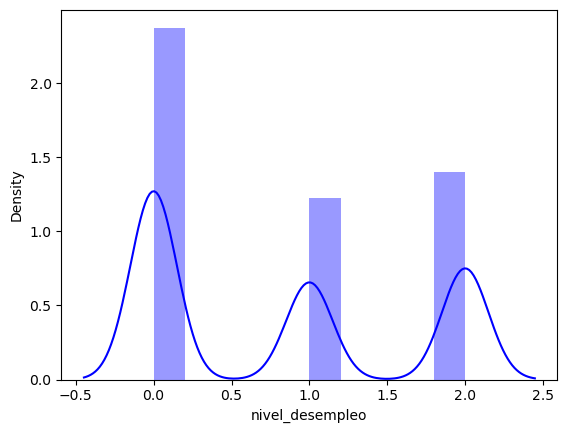

In [344]:
sns.distplot(df['nivel_desempleo'],color="blue")

El primer gráfico del campo tienda muestra que una desviación estándar de aproximadamente de 12.98, lo que indica que los números de tienda en los datos tienen cierta variabilidad alrededor de su valor promedio de 23, pero no están extremadamente dispersos.

En el grafico numero dos podemos ver como las ventas semanales tienen una distribución decreciente con picos que suben ocasionalmente, pero podemos ver una tendencia decreciente con el paso del tiempo mientras que en el grafico número tres nos damos cuenta de que las ventas se ven aumentadas cuando existe algún feriado lo cual ayuda mucho a incentivar el consumo y venta de productos en estas fechas.


### 6. Obtenga las correlaciones entre los datos de corte numérico 

In [345]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,tienda,fecha,ventas_semanales,flag_feriado,temperatura,precio_combustible,CPI,desempleo,dia,mes,anio,nivel_desempleo
tienda,1.000000,0.003933,-0.319365,0.004298,-0.026907,0.047579,-0.208538,0.309683,0.003531,0.013616,-0.007423,-0.225068
fecha,0.003933,1.000000,-0.030849,0.040903,0.037502,0.027714,0.004132,0.000353,0.999421,0.035679,0.001909,-0.000557
ventas_semanales,-0.319365,-0.030849,1.000000,0.024404,-0.041461,0.019663,-0.082900,-0.073107,-0.031938,0.043011,-0.021173,0.072670
flag_feriado,0.004298,0.040903,0.024404,1.000000,-0.156712,-0.076466,-0.000344,0.011055,0.040492,0.119893,-0.053865,0.000420
temperatura,-0.026907,0.037502,-0.041461,-0.156712,1.000000,0.145525,0.218625,0.024435,0.029631,0.245695,0.083215,0.036454
precio_combustible,0.047579,0.027714,0.019663,-0.076466,0.145525,1.000000,-0.144229,-0.105091,0.032155,-0.029197,0.782880,0.135148
CPI,-0.208538,0.004132,-0.082900,-0.000344,0.218625,-0.144229,1.000000,-0.218846,0.004386,0.001001,0.086891,0.251444
desempleo,0.309683,0.000353,-0.073107,0.011055,0.024435,-0.105091,-0.218846,1.000000,-0.000057,-0.009228,-0.242430,-0.541129
dia,0.003531,0.999421,-0.031938,0.040492,0.029631,0.032155,0.004386,-0.000057,1.000000,0.008304,0.009836,-0.001043
mes,0.013616,0.035679,0.043011,0.119893,0.245695,-0.029197,0.001001,-0.009228,0.008304,1.000000,-0.182093,0.044100


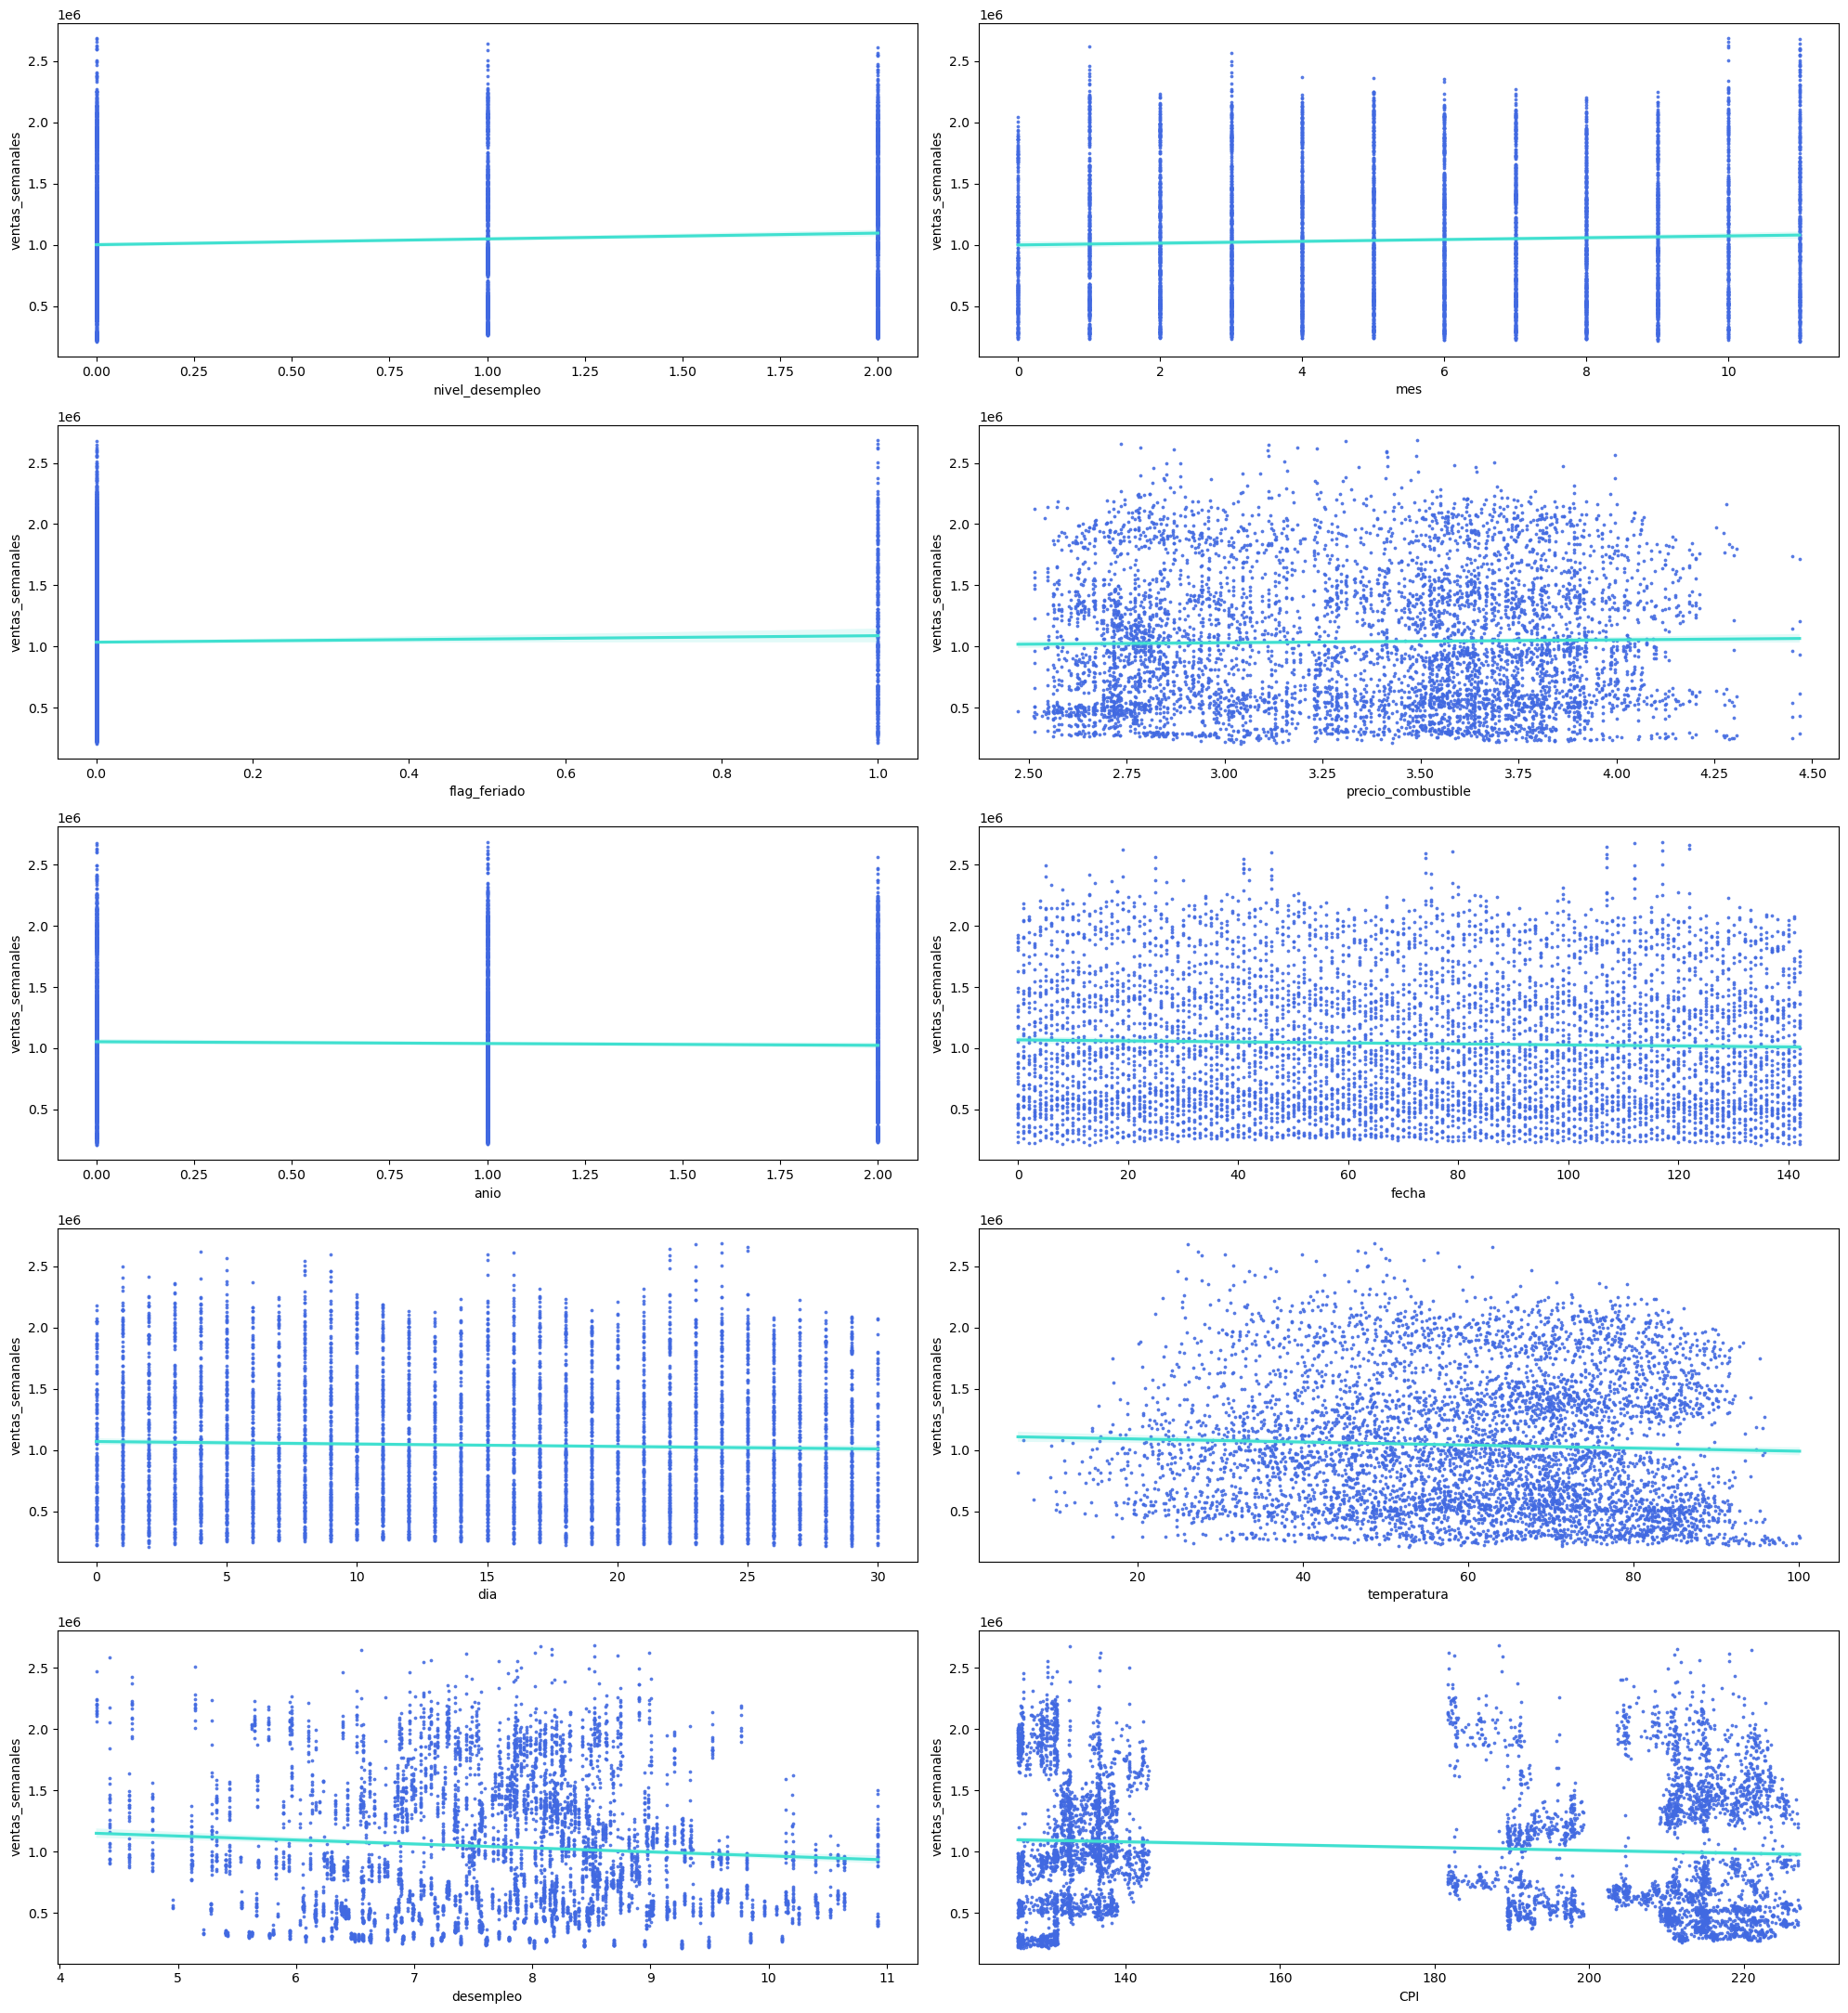

In [346]:
# Número de las variables
n = 12
fig = plt.figure(figsize=(20,30))
# Correlaciones en pares
corr = df.corr(numeric_only=True)
#
cols = corr.nlargest(12, "ventas_semanales")["ventas_semanales"].index
# Calculate correlation
for i in np.arange(1,11):
        regline = df[cols[i]]
        ax = fig.add_subplot(7,2,i)
        sns.regplot(x=regline, y=df['ventas_semanales'], scatter_kws={"color": "royalblue", "s": 3},
                    line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

### 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

Nuestra variable dependiente será ventas_semanales y las variables independientes serán los demás campos.

### 8. Indique que tipo de modelación realizarán y porqué. 

Dado que los datos de panel consisten en información recopilada a lo largo del tiempo para uno o más individuos o "casos" identificables de manera única, se llevará a cabo un análisis de panel. Esto se debe a que podemos agrupar las ventas semanales por tiendas y también agruparlas en intervalos de tiempo, como en este caso, anualmente.

### 9. Verifique los supuestos, de haber escogido el enfoque econométrico. 

### 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

#### Separamos a los predictores de nuestra variable objetivo

In [404]:
X = df[df.columns.difference(['fecha', 'ventas_semanales', 'flag_feriado', 'desempleo', 'dia', 'mes', 'anio'])]
y = df.ventas_semanales

X

,CPI,nivel_desempleo,precio_combustible,temperatura,tienda
0,211.096358,0,2.572,42.31,1
1,211.242170,0,2.548,38.51,1
2,211.289143,0,2.514,39.93,1
3,211.319643,0,2.561,46.63,1
4,211.350143,0,2.625,46.50,1
...,...,...,...,...,...
6430,192.013558,0,3.997,64.88,45
6431,192.170412,0,3.985,64.89,45
6432,192.327265,0,4.000,54.47,45
6433,192.330854,0,3.969,56.47,45


#### Entrenar el modelo con los datos de entrenamiento

In [405]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state =123)

print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4735, 5)  <class 'pandas.core.frame.DataFrame'>
(4735,) 	  <class 'pandas.core.series.Series'>
(1184, 5)  <class 'pandas.core.frame.DataFrame'>
(1184,) 	  <class 'pandas.core.series.Series'>


In [406]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

#### Realizar las predicciones

In [407]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

#### Métricas de evaluación

##### MSE

In [408]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

264231635062.3661
272702489423.2251


##### RMSE

In [409]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

514034.6632887378
522209.239120896


##### MAE

In [410]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

430086.4007050033
437165.015533291


##### R^2

In [420]:
from sklearn.metrics import r2_score

r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.12789004394852777
El R^2 del subconjunto de prueba es: 0.12188228179284866


In [412]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 1793918.1658189693
pendiente: [ -2336.47296008  29700.76014974  -2373.24215544   -562.13525727
 -14358.7446012 ]


### 11. Grafique a los valores predicho de modelo vs los valores reales.
- ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.

#### Predicciones es el subgrupo de datos de entrenamiento

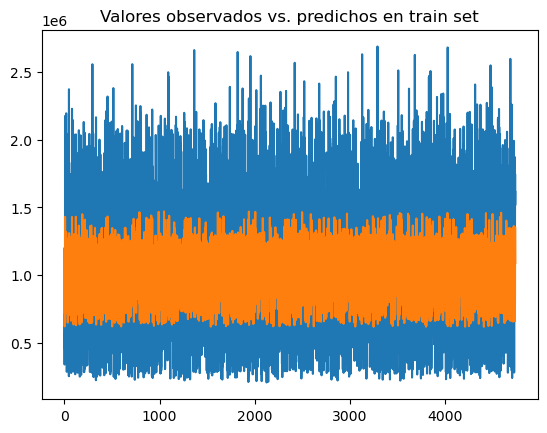

In [418]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones es el subgrupo de datos de prueba

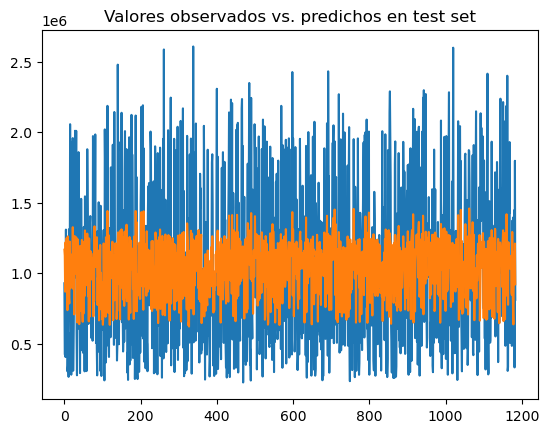

In [419]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

### 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 

### 13. Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma. 

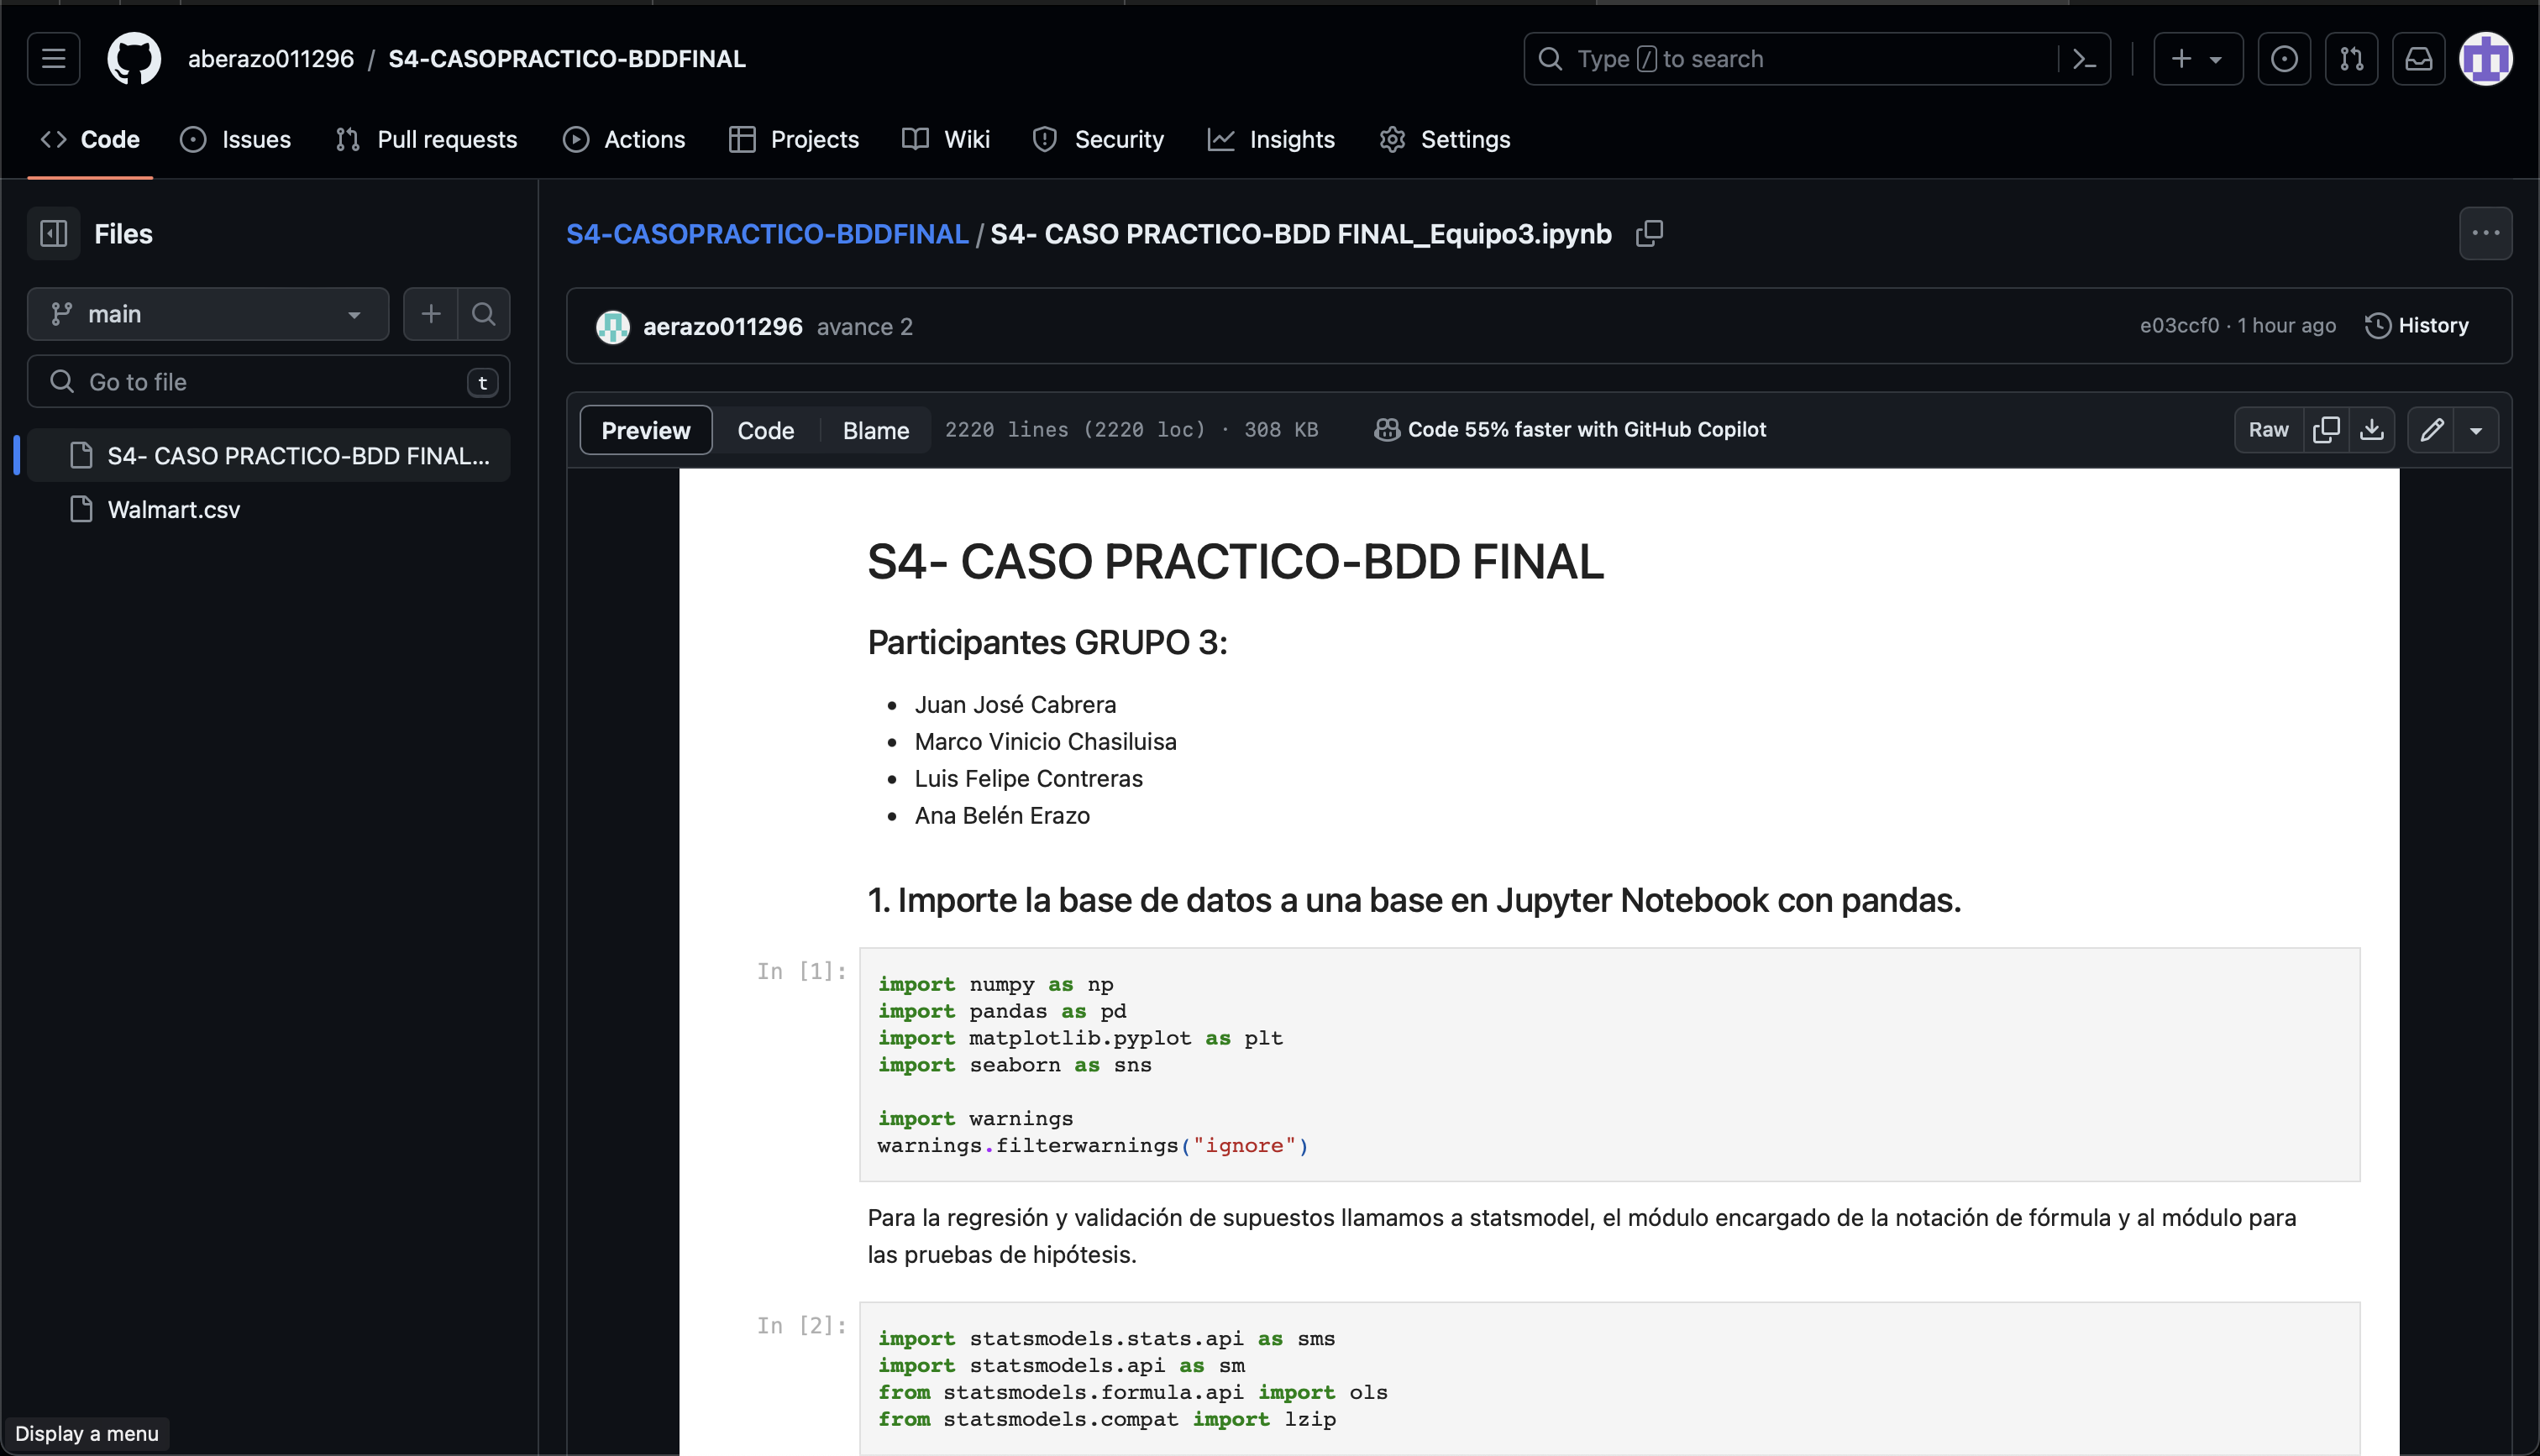